In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import os

from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
_FOLDER = "results/"
# _FOLDER = "/home/acq18mk/master/results/"

### Lasso regression

In [2]:
number_coefficients = 4
train = pd.read_csv(_FOLDER+"train08_merged_fitted_sigmoid4_123_with_drugs_description.csv")
test = pd.read_csv(_FOLDER+"test02_merged_fitted_sigmoid4_123_with_drugs_description.csv")

column_not_to_use = ["Unnamed: 0", "Unnamed: 0.1", "COSMIC_ID", "DRUG_ID", "Drug_Name", "Synonyms", "Target", "deriv_found", "PubChem_ID",
                     "elements", "inchi_key", "canonical_smiles", "inchi_string", 
                     "third_target", "first_target", "molecular_formula", "second_target", "Target_Pathway"]
#10 is the number of concentration and response points!
param1 = ["param_" +str(i) for i in range(1, number_coefficients+1)]
param2 = ["param" +str(i) for i in range(1, number_coefficients+1)] 
norm_response  = ["norm_cells_"+str(i) for i in range(10)]
con_columns  = ["fd_num_"+str(i) for i in range(10)]

not_X_columns = param1 + param2 + norm_response + con_columns + column_not_to_use
X_columns = set(train.columns) - set(not_X_columns)

columns_to_use = ["DRUG_ID", "Drug_Name", "COSMIC_ID"] + ["pred_coef_"+str(i+1) for i in range(number_coefficients)]

potential_columns_for_normalisation = []
for col in train.columns:
    if (train[col].nunique()>2) & (train[col].dtype != "O"):
        potential_columns_for_normalisation.append(col)

columns_for_normalisation = list(set(potential_columns_for_normalisation) - set(norm_response) - set(param1) - set(param2) -set(['Unnamed: 0', 'DRUG_ID', 'COSMIC_ID',]))

In [3]:
#1. just drug profiles and cell lines
alpha_parameters_df1_lasso = {1: 0.5, 2: 1.0, 3: 10.0, 4: 0.1}

# 2. drug profiles, cell lines and drug description
alpha_parameters_df2_lasso = {1: 0.5, 2: 1.0, 3: 10.0, 4: 0.1}

# 3. drug profiles, cell lines and drug features
alpha_parameters_df3_lasso = {1: 0.5, 2: 1.0, 3: 10.0, 4: 0.1}

# 4. drug profiles, cell lines and drug features with scaling
alpha_parameters_df4_lasso = {1: 0.5, 2: 1.0, 3: 10.0, 4: 0.1}

In [4]:
# with Scaling
df_test_lasso = pd.DataFrame(index=test.index)

scaler = MinMaxScaler()
scaler.fit(train[columns_for_normalisation])
train[columns_for_normalisation] = scaler.transform(train[columns_for_normalisation])
test[columns_for_normalisation] = scaler.transform(test[columns_for_normalisation])

X = train[X_columns]
X_test = test[X_columns]

# 4. drug profiles, cell lines and drug features with scaling
alpha_parameters_df4_lasso = {1: 0.5, 2: 1.0, 3: 10.0, 4: 0.1}

#************************
y = train["param_1"]
y_test = test["param_1"]
model = Lasso(alpha = 0.5)
model.fit(X, y)
features_1 = model.coef_

df_test_lasso["y_test_1"]= test["param_1"]
df_test_lasso["y_pred_1"] = model.predict(X_test)
test["pred_param_1"] = model.predict(X_test)

#************************
y = train["param_2"]
y_test = test["param_2"]
model = Lasso(alpha = 1)
model.fit(X, y)
features_2 = model.coef_

df_test_lasso["y_test_2"]= test["param_2"]
df_test_lasso["y_pred_2"] = model.predict(X_test)
test["pred_param_2"] = model.predict(X_test)

#************************
y = train["param_3"]
y_test = test["param_3"]
model = Lasso(alpha = 10)
model.fit(X, y)
features_3 = model.coef_

df_test_lasso["y_test_3"]= test["param_3"]
df_test_lasso["y_pred_3"] = model.predict(X_test)
test["pred_param_3"] = model.predict(X_test)

#************************
y = train["param_4"]
y_test = test["param_4"]
model = Lasso(alpha = 0.1)
model.fit(X, y)
features_4 = model.coef_

df_test_lasso["y_test_4"]= test["param_4"]
df_test_lasso["y_pred_4"] = model.predict(X_test)
test["pred_param_4"] = model.predict(X_test)
#************************

display(df_test_lasso.describe())

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000000,4.860000e+02,486.000000,4.860000e+02,486.000000,4.860000e+02,486.000000,486.000000
mean,0.623946,5.876545e-01,0.994099,9.959636e-01,-19.105115,-1.899108e+01,0.078222,0.080602
std,1.126649,1.111367e-16,1.168964,4.445468e-16,24.391398,3.556374e-15,0.175412,0.000000
min,-6.129963,5.876545e-01,-10.811767,9.959636e-01,-206.186539,-1.899108e+01,-1.524319,0.080602
25%,0.398606,5.876545e-01,1.011660,9.959636e-01,-20.091012,-1.899108e+01,0.005772,0.080602
50%,0.496912,5.876545e-01,1.065012,9.959636e-01,-12.729402,-1.899108e+01,0.046012,0.080602
75%,0.616302,5.876545e-01,1.167762,9.959636e-01,-9.194847,-1.899108e+01,0.164274,0.080602
max,9.830121,5.876545e-01,8.023140,9.959636e-01,5.486760,-1.899108e+01,0.562794,0.080602


In [5]:
dd= df_test_lasso.describe()
for col in dd:
    dd[col] = round(dd[col],3)
dd

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000,486.000,486.000,486.000,486.000,486.000,486.000,486.000
mean,0.624,0.588,0.994,0.996,-19.105,-18.991,0.078,0.081
std,1.127,0.000,1.169,0.000,24.391,0.000,0.175,0.000
min,-6.130,0.588,-10.812,0.996,-206.187,-18.991,-1.524,0.081
25%,0.399,0.588,1.012,0.996,-20.091,-18.991,0.006,0.081
50%,0.497,0.588,1.065,0.996,-12.729,-18.991,0.046,0.081
75%,0.616,0.588,1.168,0.996,-9.195,-18.991,0.164,0.081
max,9.830,0.588,8.023,0.996,5.487,-18.991,0.563,0.081


In [6]:
sum(features_1!=0), sum(features_2!=0), sum(features_3!=0), sum(features_4!=0)

(0, 0, 0, 0)

,coef_1,coef_2,coef_3,coef_4
count,1073.0,1073.0,1073.0,1073.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,-0.0,-0.0,-0.0
25%,-0.0,0.0,-0.0,-0.0
50%,0.0,0.0,0.0,-0.0
75%,0.0,0.0,0.0,0.0
max,0.0,-0.0,-0.0,-0.0



Prediction of sigmoid parameters
param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE: 0.2823
param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE: 0.297
param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE: 11.8854
param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE: 0.1114

Average r2 score for scipy fitting: 0.9722
Average r2 score for average sigmoid: 0.4794
Average r2 score for reconstructed with ML parameters: 0.4622

Average MAE for scipy fitting: 0.0291
Average MAE for average sigmoid: 0.1815
Average MAE for reconstructed with ML parameters: 0.1873


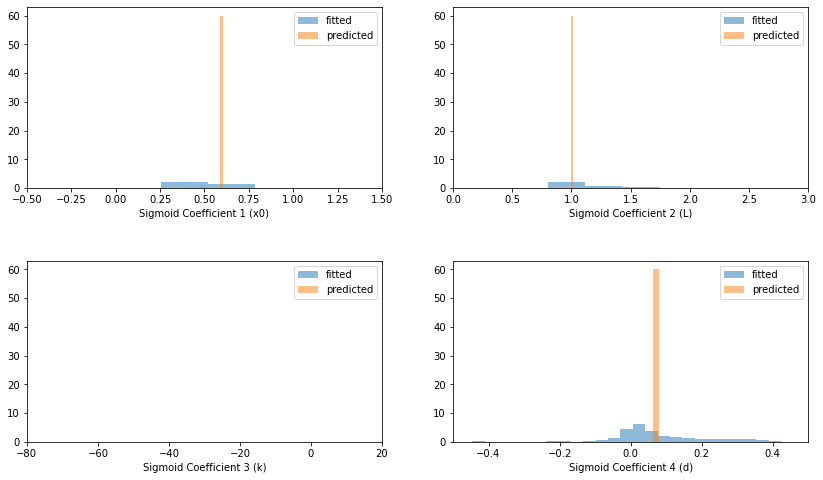

In [7]:
feature_importance = pd.DataFrame(index = X_columns)
feature_importance["coef_1"] = features_1
feature_importance["coef_2"] = features_2
feature_importance["coef_3"] = features_3
feature_importance["coef_4"] = features_4

top_ten_1 = feature_importance.sort_values("coef_1", ascending= False).index[:10]
top_ten_2 = feature_importance.sort_values("coef_2", ascending= False).index[:10]
top_ten_3 = feature_importance.sort_values("coef_3", ascending= False).index[:10]
top_ten_4 = feature_importance.sort_values("coef_4", ascending= False).index[:10]

display(feature_importance.describe())

# 1. prediction based on "personal" fitting
# 2. prediction from "average" sigmoid
# 3. predictions from learnt parameters

param1 = ["param_" +str(i) for i in range(1, number_coefficients+1)]
norm_response  = ["norm_cells_"+str(i) for i in range(10)]
conc_columns  = ["fd_num_"+str(i) for i in range(10)]
columns_to_display = ["Drug_Name", "DRUG_ID", "COSMIC_ID"] + conc_columns + norm_response + param1
test_short = test[columns_to_display].copy()


new_columns_scipy = ["pred_response_fit_"+ str(i) for i in range(10)]
new_columns_avg = ["pred_response_avg_"+ str(i) for i in range(10)]
new_columns_ML = ["pred_response_ML_"+ str(i) for i in range(10)]

# scipy fitting  
#y = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
param_1 = test["param_1"]
param_2 = test["param_2"]
param_3 = test["param_3"]
param_4 = test["param_4"]

for i, col in list(enumerate(new_columns_scipy)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# "average" sigmoid
param_1 = 0.595
param_2 = 1.015
param_3 = -18.72
param_4 = 0.083

for i, col in list(enumerate(new_columns_avg)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
    
# predictions from learnt parameters
param_1 = test["pred_param_1"]
param_2 = test["pred_param_2"]
param_3 = test["pred_param_3"]
param_4 = test["pred_param_4"]

for i, col in list(enumerate(new_columns_ML)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# errors
# for each learnt parameter
# for reconstructed points from "personal" fitting
# for "averaged" sigmoid
# for reconstructed 
print("\nPrediction of sigmoid parameters")
print("param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE:", 
      round(mean_absolute_error(test["param_1"], test["pred_param_1"]), 4))
print("param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE:", 
      round(mean_absolute_error(test["param_2"], test["pred_param_2"]), 4))
print("param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE:", 
      round(mean_absolute_error(test["param_3"], test["pred_param_3"]), 4))
print("param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE:", 
      round(mean_absolute_error(test["param_4"], test["pred_param_4"]), 4))

r2_scipy = np.zeros(len(test.index))
r2_avg_curve = np.zeros(len(test.index))
r2_ML = np.zeros(len(test.index))

mae_scipy = np.zeros(len(test.index))
mae_avg_curve = np.zeros(len(test.index))
mae_ML = np.zeros(len(test.index))

for i in range(len(test.index)):
    y_true = test.loc[test.index[i], norm_response].values.astype("float32")
    y_scipy = test.loc[test.index[i], new_columns_scipy].values.astype("float32")
    y_avg_curve = test.loc[test.index[i], new_columns_avg].values.astype("float32")
    y_ML = test.loc[test.index[i], new_columns_ML].values.astype("float32")
    
    r2_scipy[i] = r2_score(y_true, y_scipy)
    r2_avg_curve[i] = r2_score(y_true, y_avg_curve)
    r2_ML[i] = r2_score(y_true, y_ML)
    
    mae_scipy[i] = mean_absolute_error(y_true, y_scipy)
    mae_avg_curve[i] = mean_absolute_error(y_true, y_avg_curve)
    mae_ML[i] = mean_absolute_error(y_true, y_ML)
    
    mean_absolute_error

test["r2_scipy"] = r2_scipy
test["r2_avg_curve"] = r2_avg_curve
test["r2_ML"] = r2_ML

test["mae_scipy"] = mae_scipy
test["mae_avg_curve"] = mae_avg_curve
test["mae_ML"] = mae_ML

print("\nAverage r2 score for scipy fitting:", round(np.mean(r2_scipy), 4))
print("Average r2 score for average sigmoid:", round(np.mean(r2_avg_curve), 4))
print("Average r2 score for reconstructed with ML parameters:", round(np.mean(r2_ML), 4))

print("\nAverage MAE for scipy fitting:", round(np.mean(mae_scipy), 4))
print("Average MAE for average sigmoid:", round(np.mean(mae_avg_curve), 4))
print("Average MAE for reconstructed with ML parameters:", round(np.mean(mae_ML), 4))

coef_mapping= {1: "x0", 2: "L", 3: "k", 4: "d"}
x_limits = {1: [-0.5, 1.5], 2: [0,3], 3:[-80, 20], 4:[-0.5, 0.5]}

fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
bins=60
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    param_values = test["param_"+str(i)].values
    pred_param_values = test["pred_param_"+str(i)].values
    ax.hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
    ax.hist(pred_param_values, density=True, bins=bins, alpha=0.5, label = "predicted")
    ax.set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
    ax.set_xlim(x_limits[i])
    (mu, sigma) = norm.fit(param_values)
#     x = np.linspace(param_values.min(), param_values.max(), bins)
#     y = norm.pdf(x, mu, sigma)
#     ax.plot(x,y, 'r--', linewidth=2)
#     ax.set_title(r'$\mathrm{Modelling\ Normal\ distribution:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    ax.legend();

### Ridge Regression

In [8]:
# 4. drug profiles, cell lines and drug features with scaling
alpha_parameters_df4_ridge = {1: 500.0, 2: 500.0, 3: 500.0, 4: 500.0}
solver_parameters_df4_ridge = {1: 'auto', 2: 'auto', 3: 'auto', 4: 'sparse_cg'}

In [9]:
# with Scaling

df_test_ridge = pd.DataFrame(index=test.index)

scaler = MinMaxScaler()
scaler.fit(train[columns_for_normalisation])
train[columns_for_normalisation] = scaler.transform(train[columns_for_normalisation])
test[columns_for_normalisation] = scaler.transform(test[columns_for_normalisation])

X = train[X_columns]
X_test = test[X_columns]

#*************************
y = train["param_1"]
y_test = test["param_1"]

model = Ridge(alpha=500, solver="auto")
model.fit(X,y)
features_1 = model.coef_

df_test_ridge["y_test_1"]= test["param_1"]
df_test_ridge["y_pred_1"] = model.predict(X_test)
test["pred_param_1"] = model.predict(X_test)

#*************************
y = train["param_2"]
y_test = test["param_2"]
model = Ridge(alpha=500, solver="auto")
model.fit(X,y)
features_2 = model.coef_

df_test_ridge["y_test_2"]= test["param_2"]
df_test_ridge["y_pred_2"] = model.predict(X_test)
test["pred_param_2"] = model.predict(X_test)

#*************************
y = train["param_3"]
y_test = test["param_3"]
model = Ridge(alpha=500, solver="auto")
model.fit(X,y)
features_3 = model.coef_

df_test_ridge["y_test_3"]= test["param_3"]
df_test_ridge["y_pred_3"] = model.predict(X_test)
test["pred_param_3"] = model.predict(X_test)

#*************************
y = train["param_4"]
y_test = test["param_4"]
model = Ridge(alpha=500, solver="sparse_cg")
model.fit(X,y)
features_4 = model.coef_

df_test_ridge["y_test_4"]= test["param_4"]
df_test_ridge["y_pred_4"] = model.predict(X_test)
test["pred_param_4"] = model.predict(X_test)

display(df_test_ridge.describe())

print("Features!=0:", sum(features_1!=0), sum(features_2!=0), sum(features_3!=0), sum(features_4!=0))

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.623946,0.596647,0.994099,0.986638,-19.105115,-18.890427,0.078222,0.080849
std,1.126649,0.105852,1.168964,0.141039,24.391398,2.178736,0.175412,0.017917
min,-6.129963,0.305740,-10.811767,-0.335419,-206.186539,-28.770794,-1.524319,0.030266
25%,0.398606,0.532856,1.011660,0.929440,-20.091012,-20.069508,0.005772,0.068990
50%,0.496912,0.585341,1.065012,0.992990,-12.729402,-18.813967,0.046012,0.077528
75%,0.616302,0.645697,1.167762,1.072019,-9.194847,-17.510525,0.164274,0.088882
max,9.830121,1.087890,8.023140,1.333499,5.486760,-10.507887,0.562794,0.152559


Features!=0: 1063 1063 1063 1063


In [10]:
# with Scaling

df_test_ridge = pd.DataFrame(index=test.index)

scaler = MinMaxScaler()
scaler.fit(train[columns_for_normalisation])
train[columns_for_normalisation] = scaler.transform(train[columns_for_normalisation])
test[columns_for_normalisation] = scaler.transform(test[columns_for_normalisation])

X = train[X_columns]
X_test = test[X_columns]

#*************************
y = train["param_1"]
y_test = test["param_1"]

model = Ridge(alpha=500, solver="auto")
model.fit(X,y)
features_1 = model.coef_

df_test_ridge["y_test_1"]= test["param_1"]
df_test_ridge["y_pred_1"] = model.predict(X_test)
test["pred_param_1"] = model.predict(X_test)

#*************************
y = train["param_2"]
y_test = test["param_2"]
model = Ridge(alpha=500, solver="auto")
model.fit(X,y)
features_2 = model.coef_

df_test_ridge["y_test_2"]= test["param_2"]
df_test_ridge["y_pred_2"] = model.predict(X_test)
test["pred_param_2"] = model.predict(X_test)

#*************************
y = train["param_3"]
y_test = test["param_3"]
model = Ridge(alpha=500, solver="auto")
model.fit(X,y)
features_3 = model.coef_

df_test_ridge["y_test_3"]= test["param_3"]
df_test_ridge["y_pred_3"] = model.predict(X_test)
test["pred_param_3"] = model.predict(X_test)

#*************************
y = train["param_4"]
y_test = test["param_4"]
model = Ridge(alpha=500, solver="sparse_cg")
model.fit(X,y)
features_4 = model.coef_

df_test_ridge["y_test_4"]= test["param_4"]
df_test_ridge["y_pred_4"] = model.predict(X_test)
test["pred_param_4"] = model.predict(X_test)

display(df_test_ridge.describe())

print("Features!=0:", sum(features_1!=0), sum(features_2!=0), sum(features_3!=0), sum(features_4!=0))

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.623946,0.596647,0.994099,0.986638,-19.105115,-18.890427,0.078222,0.080849
std,1.126649,0.105852,1.168964,0.141039,24.391398,2.178736,0.175412,0.017917
min,-6.129963,0.305740,-10.811767,-0.335419,-206.186539,-28.770794,-1.524319,0.030266
25%,0.398606,0.532856,1.011660,0.929440,-20.091012,-20.069508,0.005772,0.068990
50%,0.496912,0.585341,1.065012,0.992990,-12.729402,-18.813967,0.046012,0.077528
75%,0.616302,0.645697,1.167762,1.072019,-9.194847,-17.510525,0.164274,0.088882
max,9.830121,1.087890,8.023140,1.333499,5.486760,-10.507887,0.562794,0.152559


Features!=0: 1063 1063 1063 1063


In [11]:
dd= df_test_ridge.describe()
for col in dd:
    dd[col] = round(dd[col],3)
dd

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000,486.000,486.000,486.000,486.000,486.000,486.000,486.000
mean,0.624,0.597,0.994,0.987,-19.105,-18.890,0.078,0.081
std,1.127,0.106,1.169,0.141,24.391,2.179,0.175,0.018
min,-6.130,0.306,-10.812,-0.335,-206.187,-28.771,-1.524,0.030
25%,0.399,0.533,1.012,0.929,-20.091,-20.070,0.006,0.069
50%,0.497,0.585,1.065,0.993,-12.729,-18.814,0.046,0.078
75%,0.616,0.646,1.168,1.072,-9.195,-17.511,0.164,0.089
max,9.830,1.088,8.023,1.333,5.487,-10.508,0.563,0.153


,coef_1,coef_2,coef_3,coef_4
count,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.000178,-0.000265,0.002525,0.000253
std,0.010021,0.014017,0.201450,0.001361
min,-0.045795,-0.086958,-1.594745,-0.006692
25%,-0.004177,-0.001349,-0.070860,-0.000483
50%,-0.001190,0.002132,0.020667,0.000181
75%,0.003307,0.005846,0.094569,0.000999
max,0.059025,0.046895,0.807498,0.006206



Prediction of sigmoid parameters
param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE: 0.3038
param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE: 0.3389
param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE: 11.9181
param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE: 0.1101

Average r2 score for scipy fitting: 0.9722
Average r2 score for average sigmoid: 0.4794
Average r2 score for reconstructed with ML parameters: -0.2472

Average MAE for scipy fitting: 0.0291
Average MAE for average sigmoid: 0.1815
Average MAE for reconstructed with ML parameters: 0.2412


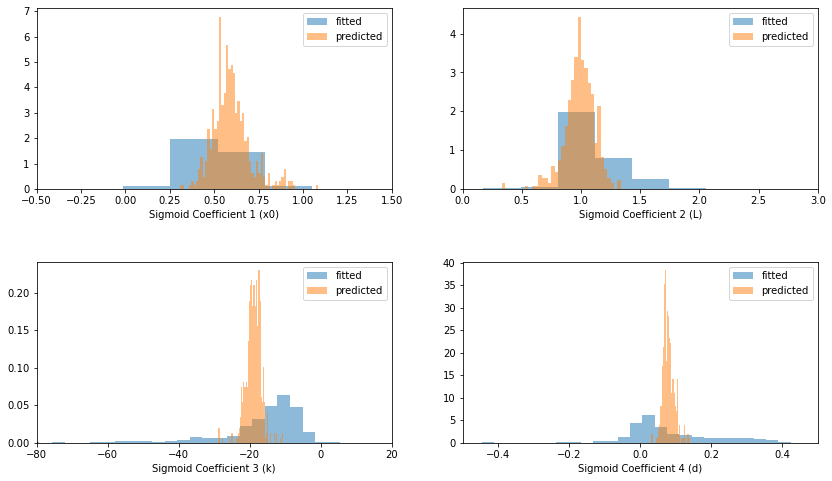

In [12]:
feature_importance = pd.DataFrame(index = X_columns)
feature_importance["coef_1"] = features_1
feature_importance["coef_2"] = features_2
feature_importance["coef_3"] = features_3
feature_importance["coef_4"] = features_4

top_ten_1 = feature_importance.sort_values("coef_1", ascending= False).index[:10]
top_ten_2 = feature_importance.sort_values("coef_2", ascending= False).index[:10]
top_ten_3 = feature_importance.sort_values("coef_3", ascending= False).index[:10]
top_ten_4 = feature_importance.sort_values("coef_4", ascending= False).index[:10]

display(feature_importance.describe())

# 1. prediction based on "personal" fitting
# 2. prediction from "average" sigmoid
# 3. predictions from learnt parameters

param1 = ["param_" +str(i) for i in range(1, number_coefficients+1)]
norm_response  = ["norm_cells_"+str(i) for i in range(10)]
conc_columns  = ["fd_num_"+str(i) for i in range(10)]
columns_to_display = ["Drug_Name", "DRUG_ID", "COSMIC_ID"] + conc_columns + norm_response + param1
test_short = test[columns_to_display].copy()


new_columns_scipy = ["pred_response_fit_"+ str(i) for i in range(10)]
new_columns_avg = ["pred_response_avg_"+ str(i) for i in range(10)]
new_columns_ML = ["pred_response_ML_"+ str(i) for i in range(10)]

# scipy fitting  
#y = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
param_1 = test["param_1"]
param_2 = test["param_2"]
param_3 = test["param_3"]
param_4 = test["param_4"]

for i, col in list(enumerate(new_columns_scipy)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# "average" sigmoid
param_1 = 0.595
param_2 = 1.015
param_3 = -18.72
param_4 = 0.083

for i, col in list(enumerate(new_columns_avg)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
    
# predictions from learnt parameters
param_1 = test["pred_param_1"]
param_2 = test["pred_param_2"]
param_3 = test["pred_param_3"]
param_4 = test["pred_param_4"]

for i, col in list(enumerate(new_columns_ML)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# errors
# for each learnt parameter
# for reconstructed points from "personal" fitting
# for "averaged" sigmoid
# for reconstructed 
print("\nPrediction of sigmoid parameters")
print("param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE:", 
      round(mean_absolute_error(test["param_1"], test["pred_param_1"]), 4))
print("param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE:", 
      round(mean_absolute_error(test["param_2"], test["pred_param_2"]), 4))
print("param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE:", 
      round(mean_absolute_error(test["param_3"], test["pred_param_3"]), 4))
print("param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE:", 
      round(mean_absolute_error(test["param_4"], test["pred_param_4"]), 4))

r2_scipy = np.zeros(len(test.index))
r2_avg_curve = np.zeros(len(test.index))
r2_ML = np.zeros(len(test.index))

mae_scipy = np.zeros(len(test.index))
mae_avg_curve = np.zeros(len(test.index))
mae_ML = np.zeros(len(test.index))

for i in range(len(test.index)):
    y_true = test.loc[test.index[i], norm_response].values.astype("float32")
    y_scipy = test.loc[test.index[i], new_columns_scipy].values.astype("float32")
    y_avg_curve = test.loc[test.index[i], new_columns_avg].values.astype("float32")
    y_ML = test.loc[test.index[i], new_columns_ML].values.astype("float32")
    
    r2_scipy[i] = r2_score(y_true, y_scipy)
    r2_avg_curve[i] = r2_score(y_true, y_avg_curve)
    r2_ML[i] = r2_score(y_true, y_ML)
    
    mae_scipy[i] = mean_absolute_error(y_true, y_scipy)
    mae_avg_curve[i] = mean_absolute_error(y_true, y_avg_curve)
    mae_ML[i] = mean_absolute_error(y_true, y_ML)
    
    mean_absolute_error

test["r2_scipy"] = r2_scipy
test["r2_avg_curve"] = r2_avg_curve
test["r2_ML"] = r2_ML

test["mae_scipy"] = mae_scipy
test["mae_avg_curve"] = mae_avg_curve
test["mae_ML"] = mae_ML

print("\nAverage r2 score for scipy fitting:", round(np.mean(r2_scipy), 4))
print("Average r2 score for average sigmoid:", round(np.mean(r2_avg_curve), 4))
print("Average r2 score for reconstructed with ML parameters:", round(np.mean(r2_ML), 4))

print("\nAverage MAE for scipy fitting:", round(np.mean(mae_scipy), 4))
print("Average MAE for average sigmoid:", round(np.mean(mae_avg_curve), 4))
print("Average MAE for reconstructed with ML parameters:", round(np.mean(mae_ML), 4))

coef_mapping= {1: "x0", 2: "L", 3: "k", 4: "d"}
x_limits = {1: [-0.5, 1.5], 2: [0,3], 3:[-80, 20], 4:[-0.5, 0.5]}

fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
bins=60
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    param_values = test["param_"+str(i)].values
    pred_param_values = test["pred_param_"+str(i)].values
    ax.hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
    ax.hist(pred_param_values, density=True, bins=bins, alpha=0.5, label = "predicted")
    ax.set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
    ax.set_xlim(x_limits[i])
    (mu, sigma) = norm.fit(param_values)
#     x = np.linspace(param_values.min(), param_values.max(), bins)
#     y = norm.pdf(x, mu, sigma)
#     ax.plot(x,y, 'r--', linewidth=2)
#     ax.set_title(r'$\mathrm{Modelling\ Normal\ distribution:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    ax.legend();

### Kernel Ridge

In [13]:
pd.read_csv(_FOLDER+"kernel_ridge_model_parameters_drug_cells_PubChem_Scaling.csv")

,Unnamed: 0,kernel,kernel_parameters
0,coef_1,polynomial,"{'alpha': 5.0, 'gamma': 1e-05, 'degree': 1.0}"
1,coef_2,polynomial,"[{'alpha': 1.0, 'gamma': 1e-05, 'degree': 1.0}]"
2,coef_3,polynomial,"[{'alpha': 1.0, 'gamma': 1e-05, 'degree': 1.0}]"
3,coef_4,sigmoid,"[{'alpha': 0.5, 'gamma': 0.01, 'coef0': 5.0}]"


In [14]:
# 4 with scaling
train = pd.read_csv(_FOLDER+"train08_merged_fitted_sigmoid4_123_with_drugs_properties.csv")
test = pd.read_csv(_FOLDER+"test02_merged_fitted_sigmoid4_123_with_drugs_properties.csv")

df_test=pd.DataFrame(index=test.index)

scaler = MinMaxScaler()
scaler.fit(train[columns_for_normalisation])
train[columns_for_normalisation] = scaler.transform(train[columns_for_normalisation])
test[columns_for_normalisation] = scaler.transform(test[columns_for_normalisation])

X = train[X_columns]
X_test = test[X_columns]

#***********************************
y = train["param_1"]
y_test = test["param_1"]
model = KernelRidge(kernel='polynomial', alpha=7,gamma=0.00001, degree=1)
model.fit(X,y)

df_test["y_test_1"]= test["param_1"]
pred_param_1 = model.predict(X_test)
df_test["y_pred_1"] = pred_param_1
test["pred_param_1"] = pred_param_1

#***********************************
y = train["param_2"]
y_test = test["param_2"]
model = KernelRidge(kernel='polynomial', alpha=1, gamma=0.01, coef0=-0.1)
model.fit(X,y)

df_test["y_test_2"]= test["param_2"]
pred_param_2 = model.predict(X_test)
df_test["y_pred_2"] = pred_param_2
test["pred_param_2"] = pred_param_2

#***********************************
y = train["param_3"]
y_test = test["param_3"]
model = KernelRidge(kernel='linear', alpha=500)
model.fit(X,y)

df_test["y_test_3"]= test["param_3"]
pred_param_3 = model.predict(X_test)
df_test["y_pred_3"] = pred_param_3
test["pred_param_3"] = pred_param_3

#***********************************
y = train["param_4"]
y_test = test["param_4"]
model = KernelRidge(kernel='sigmoid', alpha=1, gamma=0.00001, coef0=5)
model.fit(X,y)

df_test["y_test_4"]= test["param_4"]
pred_param_4 = model.predict(X_test)
df_test["y_pred_4"] = pred_param_4
test["pred_param_4"] = pred_param_4

display(df_test.describe())

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02
mean,0.623946,0.585417,0.994099,-1.090286,-19.105115,-15.878420,0.078222,8.055809e-02
std,1.126649,0.000216,1.168964,0.897882,24.391398,5.178585,0.175412,5.870082e-08
min,-6.129963,0.584878,-10.811767,-3.315599,-206.186539,-37.026389,-1.524319,8.055794e-02
25%,0.398606,0.585287,1.011660,-1.607800,-20.091012,-19.436331,0.005772,8.055806e-02
50%,0.496912,0.585418,1.065012,-1.159089,-12.729402,-16.307873,0.046012,8.055808e-02
75%,0.616302,0.585550,1.167762,-0.681236,-9.194847,-12.464341,0.164274,8.055811e-02
max,9.830121,0.586210,8.023140,2.554691,5.486760,-1.906954,0.562794,8.055833e-02


In [15]:
dd= df_test.describe()
for col in dd:
    dd[col] = round(dd[col],3)
dd

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000,486.000,486.000,486.000,486.000,486.000,486.000,486.000
mean,0.624,0.585,0.994,-1.090,-19.105,-15.878,0.078,0.081
std,1.127,0.000,1.169,0.898,24.391,5.179,0.175,0.000
min,-6.130,0.585,-10.812,-3.316,-206.187,-37.026,-1.524,0.081
25%,0.399,0.585,1.012,-1.608,-20.091,-19.436,0.006,0.081
50%,0.497,0.585,1.065,-1.159,-12.729,-16.308,0.046,0.081
75%,0.616,0.586,1.168,-0.681,-9.195,-12.464,0.164,0.081
max,9.830,0.586,8.023,2.555,5.487,-1.907,0.563,0.081


In [16]:
feature_importance = pd.DataFrame(index = X_columns)
feature_importance["coef_1"] = features_1
feature_importance["coef_2"] = features_2
feature_importance["coef_3"] = features_3
feature_importance["coef_4"] = features_4

top_ten_1 = feature_importance.sort_values("coef_1", ascending= False).index[:10]
top_ten_2 = feature_importance.sort_values("coef_2", ascending= False).index[:10]
top_ten_3 = feature_importance.sort_values("coef_3", ascending= False).index[:10]
top_ten_4 = feature_importance.sort_values("coef_4", ascending= False).index[:10]

display(feature_importance.describe())

# 1. prediction based on "personal" fitting
# 2. prediction from "average" sigmoid
# 3. predictions from learnt parameters

param1 = ["param_" +str(i) for i in range(1, number_coefficients+1)]
norm_response  = ["norm_cells_"+str(i) for i in range(10)]
conc_columns  = ["fd_num_"+str(i) for i in range(10)]
columns_to_display = ["Drug_Name", "DRUG_ID", "COSMIC_ID"] + conc_columns + norm_response + param1
test_short = test[columns_to_display].copy()


new_columns_scipy = ["pred_response_fit_"+ str(i) for i in range(10)]
new_columns_avg = ["pred_response_avg_"+ str(i) for i in range(10)]
new_columns_ML = ["pred_response_ML_"+ str(i) for i in range(10)]

# scipy fitting  
#y = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
param_1 = test["param_1"]
param_2 = test["param_2"]
param_3 = test["param_3"]
param_4 = test["param_4"]

for i, col in list(enumerate(new_columns_scipy)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# "average" sigmoid
param_1 = 0.595
param_2 = 1.015
param_3 = -18.72
param_4 = 0.083

for i, col in list(enumerate(new_columns_avg)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
    
# predictions from learnt parameters
param_1 = test["pred_param_1"]
param_2 = test["pred_param_2"]
param_3 = test["pred_param_3"]
param_4 = test["pred_param_4"]

for i, col in list(enumerate(new_columns_ML)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# errors
# for each learnt parameter
# for reconstructed points from "personal" fitting
# for "averaged" sigmoid
# for reconstructed 
print("\nPrediction of sigmoid parameters")
print("param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE:", 
      round(mean_absolute_error(test["param_1"], test["pred_param_1"]), 4))
print("param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE:", 
      round(mean_absolute_error(test["param_2"], test["pred_param_2"]), 4))
print("param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE:", 
      round(mean_absolute_error(test["param_3"], test["pred_param_3"]), 4))
print("param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE:", 
      round(mean_absolute_error(test["param_4"], test["pred_param_4"]), 4))

r2_scipy = np.zeros(len(test.index))
r2_avg_curve = np.zeros(len(test.index))
r2_ML = np.zeros(len(test.index))

mae_scipy = np.zeros(len(test.index))
mae_avg_curve = np.zeros(len(test.index))
mae_ML = np.zeros(len(test.index))

for i in range(len(test.index)):
    y_true = test.loc[test.index[i], norm_response].values.astype("float32")
    y_scipy = test.loc[test.index[i], new_columns_scipy].values.astype("float32")
    y_avg_curve = test.loc[test.index[i], new_columns_avg].values.astype("float32")
    y_ML = test.loc[test.index[i], new_columns_ML].values.astype("float32")
    
    r2_scipy[i] = r2_score(y_true, y_scipy)
    r2_avg_curve[i] = r2_score(y_true, y_avg_curve)
    r2_ML[i] = r2_score(y_true, y_ML)
    
    mae_scipy[i] = mean_absolute_error(y_true, y_scipy)
    mae_avg_curve[i] = mean_absolute_error(y_true, y_avg_curve)
    mae_ML[i] = mean_absolute_error(y_true, y_ML)
    
    mean_absolute_error

test["r2_scipy"] = r2_scipy
test["r2_avg_curve"] = r2_avg_curve
test["r2_ML"] = r2_ML

test["mae_scipy"] = mae_scipy
test["mae_avg_curve"] = mae_avg_curve
test["mae_ML"] = mae_ML

print("\nAverage r2 score for scipy fitting:", round(np.mean(r2_scipy), 4))
print("Average r2 score for average sigmoid:", round(np.mean(r2_avg_curve), 4))
print("Average r2 score for reconstructed with ML parameters:", round(np.mean(r2_ML), 4))

print("\nAverage MAE for scipy fitting:", round(np.mean(mae_scipy), 4))
print("Average MAE for average sigmoid:", round(np.mean(mae_avg_curve), 4))
print("Average MAE for reconstructed with ML parameters:", round(np.mean(mae_ML), 4))

,coef_1,coef_2,coef_3,coef_4
count,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.000178,-0.000265,0.002525,0.000253
std,0.010021,0.014017,0.201450,0.001361
min,-0.045795,-0.086958,-1.594745,-0.006692
25%,-0.004177,-0.001349,-0.070860,-0.000483
50%,-0.001190,0.002132,0.020667,0.000181
75%,0.003307,0.005846,0.094569,0.000999
max,0.059025,0.046895,0.807498,0.006206



Prediction of sigmoid parameters
param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE: 0.2813
param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE: 2.3201
param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE: 11.9172
param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE: 0.1114

Average r2 score for scipy fitting: 0.9722
Average r2 score for average sigmoid: 0.4794
Average r2 score for reconstructed with ML parameters: -1818.2872

Average MAE for scipy fitting: 0.0291
Average MAE for average sigmoid: 0.1815
Average MAE for reconstructed with ML parameters: 2.4519


/Users/Marina/anaconda3/envs/myspark/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """Entry point for launching an IPython kernel.


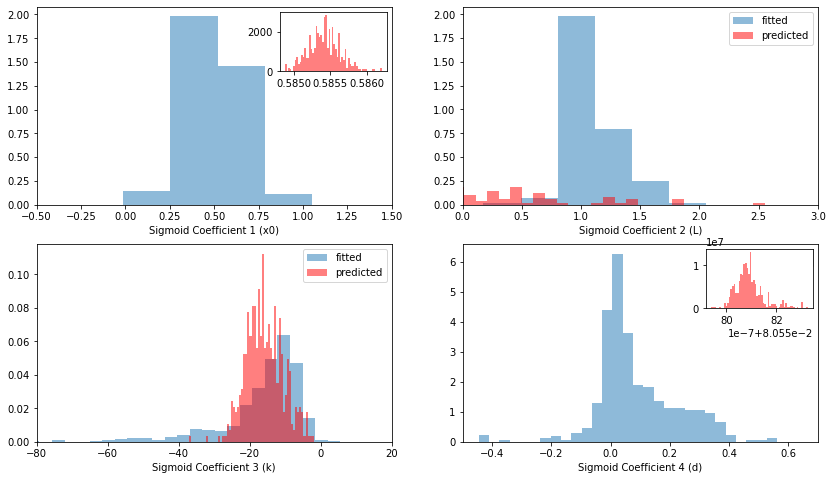

In [17]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
coef_mapping= {1: "x0", 2: "L", 3: "k", 4: "d"}
x_limits = {1: [-0.5, 1.5], 2: [0,3], 3:[-80, 20], 4:[-0.5, 0.7]}

fig, ax = plt.subplots(2, 2, figsize=(14, 8))

bins=60
i = 1
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values

ax[0,0].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
# ax[0,0].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[0,0].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[0,0].set_xlim(x_limits[i])
inset_ax = inset_axes(ax[0,0], height="30%", width="30%") 
inset_ax.hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
# ax[0,0].legend()
# ax[0,0].legend(loc='center left')#, bbox_to_anchor=(1, 0.5))

i = 2
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values
ax[0,1].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
ax[0,1].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[0,1].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[0,1].set_xlim(x_limits[i])
ax[0,1].legend()

i = 3
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values
ax[1,0].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
ax[1,0].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[1,0].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[1,0].set_xlim(x_limits[i])
ax[1,0].legend()

i = 4
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values
ax[1,1].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
# ax[1,1].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[1,1].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[1,1].set_xlim(x_limits[i])
inset_ax = inset_axes(ax[1,1], height="30%", width="30%") 
inset_ax.hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")

ax[1,1].legend();

### Support Vector Regression 

In [18]:
pd.read_csv("results/svr_model_parameters_drug_cells_PubChem_Scaling.csv")

,Unnamed: 0,kernel,kernel_parameters
0,coef_1,rbf,"{'C': 5.0, 'coef0': -0.1, 'epsilon': 0.1}"
1,coef_2,rbf,"[{'C': 7.0, 'coef0': -0.1, 'epsilon': 0.1}]"
2,coef_3,linear,"[{'epsilon': 5.0, 'C': 0.5}]"
3,coef_4,sigmoid,"[{'C': 7.0, 'coef0': 5.0, 'epsilon': 0.1}]"


In [19]:
# 4
train = pd.read_csv(_FOLDER+"train08_merged_fitted_sigmoid4_123_with_drugs_properties.csv")
test = pd.read_csv(_FOLDER+"test02_merged_fitted_sigmoid4_123_with_drugs_properties.csv")

df_test=pd.DataFrame(index=test.index)

scaler = MinMaxScaler()
scaler.fit(train[columns_for_normalisation])
train[columns_for_normalisation] = scaler.transform(train[columns_for_normalisation])
test[columns_for_normalisation] = scaler.transform(test[columns_for_normalisation])

X = train[X_columns]
X_test = test[X_columns]

#***********************************
y = train["param_1"]
y_test = test["param_1"]
model = SVR(kernel='rbf', C=5, epsilon=0.1, coef0=-0.1)
model.fit(X,y)

df_test["y_test_1"]= test["param_1"]
pred_param_1 = model.predict(X_test)
df_test["y_pred_1"] = pred_param_1
test["pred_param_1"] = pred_param_1

#***********************************
y = train["param_2"]
y_test = test["param_2"]
model = SVR(kernel='rbf', C=7, epsilon=0.1, coef0=-0.1)
model.fit(X,y)

df_test["y_test_2"]= test["param_2"]
pred_param_2 = model.predict(X_test)
df_test["y_pred_2"] = pred_param_2
test["pred_param_2"] = pred_param_2

#***********************************
y = train["param_3"]
y_test = test["param_3"]
model = SVR(kernel='linear', C=0.5, epsilon=5)
model.fit(X,y)

df_test["y_test_3"]= test["param_3"]
pred_param_3 = model.predict(X_test)
df_test["y_pred_3"] = pred_param_3
test["pred_param_3"] = pred_param_3
#***********************************
y = train["param_4"]
y_test = test["param_4"]
model = SVR(kernel='sigmoid', C=7, epsilon=0.1, coef0=5)
model.fit(X,y)

df_test["y_test_4"]= test["param_4"]
pred_param_4 = model.predict(X_test)
df_test["y_pred_4"] = pred_param_4
test["pred_param_4"] = pred_param_4

display(df_test.describe())

/Users/Marina/anaconda3/envs/myspark/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Marina/anaconda3/envs/myspark/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Marina/anaconda3/envs/myspark/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.623946,0.497396,0.994099,1.106686,-19.105115,-14.826592,0.078222,0.098843
std,1.126649,0.049157,1.168964,0.069137,24.391398,3.049297,0.175412,0.000193
min,-6.129963,0.358391,-10.811767,0.932567,-206.186539,-25.317269,-1.524319,0.098274
25%,0.398606,0.466040,1.011660,1.071331,-20.091012,-16.848045,0.005772,0.098717
50%,0.496912,0.495916,1.065012,1.099444,-12.729402,-14.559673,0.046012,0.098844
75%,0.616302,0.527185,1.167762,1.135948,-9.194847,-12.689404,0.164274,0.098939
max,9.830121,0.644903,8.023140,1.389080,5.486760,-6.521922,0.562794,0.099604


In [20]:
dd= df_test.describe()
for col in dd:
    dd[col] = round(dd[col],3)
dd

,y_test_1,y_pred_1,y_test_2,y_pred_2,y_test_3,y_pred_3,y_test_4,y_pred_4
count,486.000,486.000,486.000,486.000,486.000,486.000,486.000,486.000
mean,0.624,0.497,0.994,1.107,-19.105,-14.827,0.078,0.099
std,1.127,0.049,1.169,0.069,24.391,3.049,0.175,0.000
min,-6.130,0.358,-10.812,0.933,-206.187,-25.317,-1.524,0.098
25%,0.399,0.466,1.012,1.071,-20.091,-16.848,0.006,0.099
50%,0.497,0.496,1.065,1.099,-12.729,-14.560,0.046,0.099
75%,0.616,0.527,1.168,1.136,-9.195,-12.689,0.164,0.099
max,9.830,0.645,8.023,1.389,5.487,-6.522,0.563,0.100


In [21]:
feature_importance = pd.DataFrame(index = X_columns)
feature_importance["coef_1"] = features_1
feature_importance["coef_2"] = features_2
feature_importance["coef_3"] = features_3
feature_importance["coef_4"] = features_4

top_ten_1 = feature_importance.sort_values("coef_1", ascending= False).index[:10]
top_ten_2 = feature_importance.sort_values("coef_2", ascending= False).index[:10]
top_ten_3 = feature_importance.sort_values("coef_3", ascending= False).index[:10]
top_ten_4 = feature_importance.sort_values("coef_4", ascending= False).index[:10]

display(feature_importance.describe())

# 1. prediction based on "personal" fitting
# 2. prediction from "average" sigmoid
# 3. predictions from learnt parameters

param1 = ["param_" +str(i) for i in range(1, number_coefficients+1)]
norm_response  = ["norm_cells_"+str(i) for i in range(10)]
conc_columns  = ["fd_num_"+str(i) for i in range(10)]
columns_to_display = ["Drug_Name", "DRUG_ID", "COSMIC_ID"] + conc_columns + norm_response + param1
test_short = test[columns_to_display].copy()


new_columns_scipy = ["pred_response_fit_"+ str(i) for i in range(10)]
new_columns_avg = ["pred_response_avg_"+ str(i) for i in range(10)]
new_columns_ML = ["pred_response_ML_"+ str(i) for i in range(10)]

# scipy fitting  
#y = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
param_1 = test["param_1"]
param_2 = test["param_2"]
param_3 = test["param_3"]
param_4 = test["param_4"]

for i, col in list(enumerate(new_columns_scipy)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# "average" sigmoid
param_1 = 0.595
param_2 = 1.015
param_3 = -18.72
param_4 = 0.083

for i, col in list(enumerate(new_columns_avg)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4
    
# predictions from learnt parameters
param_1 = test["pred_param_1"]
param_2 = test["pred_param_2"]
param_3 = test["pred_param_3"]
param_4 = test["pred_param_4"]

for i, col in list(enumerate(new_columns_ML)):
    x = test[conc_columns[i]]
    test[col] = 1/(param_2 + np.exp(-param_3* (x- param_1))) + param_4

# errors
# for each learnt parameter
# for reconstructed points from "personal" fitting
# for "averaged" sigmoid
# for reconstructed 
print("\nPrediction of sigmoid parameters")
print("param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE:", 
      round(mean_absolute_error(test["param_1"], test["pred_param_1"]), 4))
print("param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE:", 
      round(mean_absolute_error(test["param_2"], test["pred_param_2"]), 4))
print("param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE:", 
      round(mean_absolute_error(test["param_3"], test["pred_param_3"]), 4))
print("param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE:", 
      round(mean_absolute_error(test["param_4"], test["pred_param_4"]), 4))

r2_scipy = np.zeros(len(test.index))
r2_avg_curve = np.zeros(len(test.index))
r2_ML = np.zeros(len(test.index))

mae_scipy = np.zeros(len(test.index))
mae_avg_curve = np.zeros(len(test.index))
mae_ML = np.zeros(len(test.index))

for i in range(len(test.index)):
    y_true = test.loc[test.index[i], norm_response].values.astype("float32")
    y_scipy = test.loc[test.index[i], new_columns_scipy].values.astype("float32")
    y_avg_curve = test.loc[test.index[i], new_columns_avg].values.astype("float32")
    y_ML = test.loc[test.index[i], new_columns_ML].values.astype("float32")
    
    r2_scipy[i] = r2_score(y_true, y_scipy)
    r2_avg_curve[i] = r2_score(y_true, y_avg_curve)
    r2_ML[i] = r2_score(y_true, y_ML)
    
    mae_scipy[i] = mean_absolute_error(y_true, y_scipy)
    mae_avg_curve[i] = mean_absolute_error(y_true, y_avg_curve)
    mae_ML[i] = mean_absolute_error(y_true, y_ML)
    
    mean_absolute_error

test["r2_scipy"] = r2_scipy
test["r2_avg_curve"] = r2_avg_curve
test["r2_ML"] = r2_ML

test["mae_scipy"] = mae_scipy
test["mae_avg_curve"] = mae_avg_curve
test["mae_ML"] = mae_ML

print("\nAverage r2 score for scipy fitting:", round(np.mean(r2_scipy), 4))
print("Average r2 score for average sigmoid:", round(np.mean(r2_avg_curve), 4))
print("Average r2 score for reconstructed with ML parameters:", round(np.mean(r2_ML), 4))

print("\nAverage MAE for scipy fitting:", round(np.mean(mae_scipy), 4))
print("Average MAE for average sigmoid:", round(np.mean(mae_avg_curve), 4))
print("Average MAE for reconstructed with ML parameters:", round(np.mean(mae_ML), 4))

,coef_1,coef_2,coef_3,coef_4
count,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.000178,-0.000265,0.002525,0.000253
std,0.010021,0.014017,0.201450,0.001361
min,-0.045795,-0.086958,-1.594745,-0.006692
25%,-0.004177,-0.001349,-0.070860,-0.000483
50%,-0.001190,0.002132,0.020667,0.000181
75%,0.003307,0.005846,0.094569,0.000999
max,0.059025,0.046895,0.807498,0.006206



Prediction of sigmoid parameters
param_1: x0 = [-12.73, 10.32] mean = 0.595 ;  25-75% [0.39-0.50], MAE: 0.2682
param_2: L = [-35, 31.90]     mean = 1.015 ;  25-75% [1.01-1.20], MAE: 0.2891
param_3: k = =[-282.7, 10.08] mean = -18.72 ; 25-75%[-20.4 , -8.7], MAE: 10.6251
param_4: d = [-2.79, 1.79]    mean = 0.083 ;  25-75% [0.005, 0.174], MAE: 0.116

Average r2 score for scipy fitting: 0.9722
Average r2 score for average sigmoid: 0.4794
Average r2 score for reconstructed with ML parameters: 0.6683

Average MAE for scipy fitting: 0.0291
Average MAE for average sigmoid: 0.1815
Average MAE for reconstructed with ML parameters: 0.1351


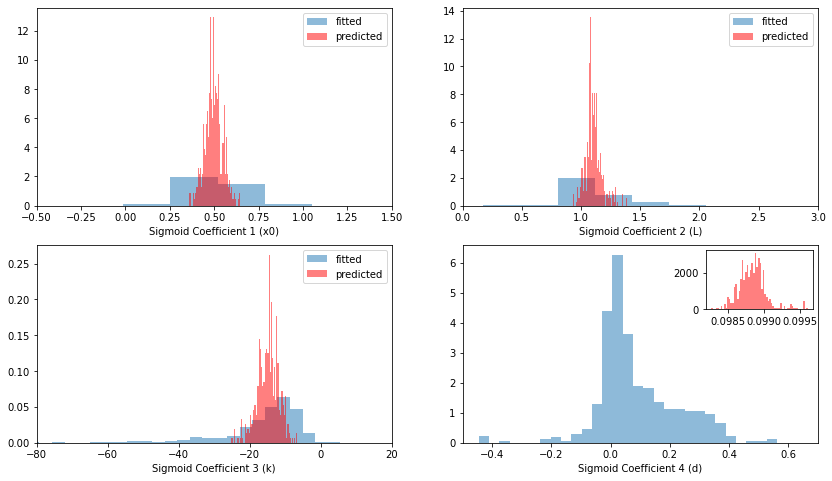

In [22]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
coef_mapping= {1: "x0", 2: "L", 3: "k", 4: "d"}
x_limits = {1: [-0.5, 1.5], 2: [0,3], 3:[-80, 20], 4:[-0.5, 0.7]}

fig, ax = plt.subplots(2, 2, figsize=(14, 8))

bins=60
i = 1
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values

ax[0,0].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
ax[0,0].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[0,0].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[0,0].set_xlim(x_limits[i])
# inset_ax = inset_axes(ax[0,0], height="30%", width="30%") 
# inset_ax.hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[0,0].legend()
# ax[0,0].legend(loc='center left')#, bbox_to_anchor=(1, 0.5))

i = 2
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values
ax[0,1].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
ax[0,1].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[0,1].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[0,1].set_xlim(x_limits[i])
ax[0,1].legend()

i = 3
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values
ax[1,0].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
ax[1,0].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[1,0].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[1,0].set_xlim(x_limits[i])
ax[1,0].legend()

i = 4
param_values = test["param_"+str(i)].values
pred_param_values = test["pred_param_"+str(i)].values
ax[1,1].hist(param_values, density=True, bins=bins, alpha=0.5, label = "fitted")
# ax[1,1].hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red",label = "predicted")
ax[1,1].set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
ax[1,1].set_xlim(x_limits[i])
inset_ax = inset_axes(ax[1,1], height="30%", width="30%") 
inset_ax.hist(pred_param_values, density=True, bins=bins, alpha=0.5, color="red", label = "predicted")

ax[1,1].legend();